In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:/jupyter/consumer_ANN.csv")

In [3]:
df

,Consumer Disputed?,Product_Checking or savings account,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Submitted Via_Postal mail,Submitted Via_Referral,Submitted Via_Web,Company Response To Consumer_Closed with explanation,Company Response To Consumer_Closed with monetary relief,Company Response To Consumer_Closed with non-monetary relief,Company Response To Consumer_Closed with relief,Company Response To Consumer_Closed without relief,Company Response To Consumer_Untimely response,Timely Response?_Yes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768495,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
768496,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
768497,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
768498,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1


In [4]:
df.shape

(768500, 25)

In [5]:
df.isnull().sum()

Consumer Disputed?                                              0
Product_Checking or savings account                             0
Product_Consumer Loan                                           0
Product_Credit card                                             0
Product_Credit reporting                                        0
Product_Debt collection                                         0
Product_Money transfers                                         0
Product_Mortgage                                                0
Product_Other financial service                                 0
Product_Payday loan                                             0
Product_Prepaid card                                            0
Product_Student loan                                            0
Product_Virtual currency                                        0
Submitted Via_Fax                                               0
Submitted Via_Phone                                             0
Submitted 

In [6]:
df.duplicated().sum()

767595

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(905, 25)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 767634
Data columns (total 25 columns):
 #   Column                                                        Non-Null Count  Dtype
---  ------                                                        --------------  -----
 0   Consumer Disputed?                                            905 non-null    int64
 1   Product_Checking or savings account                           905 non-null    int64
 2   Product_Consumer Loan                                         905 non-null    int64
 3   Product_Credit card                                           905 non-null    int64
 4   Product_Credit reporting                                      905 non-null    int64
 5   Product_Debt collection                                       905 non-null    int64
 6   Product_Money transfers                                       905 non-null    int64
 7   Product_Mortgage                                              905 non-null    int64
 8

In [12]:
x = df.drop('Consumer Disputed?',axis=1)
y = df['Consumer Disputed?']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
X_train.shape

(724, 24)

In [16]:
X_test.shape

(181, 24)

In [17]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import losses,datasets,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [18]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim = 24))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [19]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),verbose=0)

# Hyperparameter-tuning in Neural Network[keras-tuner]

In [20]:
# How to select appropriate opyomizer 
# how to select nodes in a layer
# how to select no. of layers
# all in all one model

In [21]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


In [22]:
import keras_tuner as kt

In [61]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32,activation='relu',input_dim=24))
    model.add(Dense(1,activation='sigmoid'))
    optimizer =  hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta'])
    model.compile(optimizer =optimizer,loss = 'binary_crossentropy',metrics = ['accuracy'])
    return model

In [62]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [63]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [64]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [27]:
model = tuner.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                800       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
23/23 [==============================] - 2s 25ms/step - loss: 0.6740 - accuracy: 0.5829 - val_loss: 0.6682 - val_accuracy: 0.6077
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6713 - accuracy: 0.5829 - val_loss: 0.6677 - val_accuracy: 0.6077
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6684 - accuracy: 0.5829 - val_loss: 0.6691 - val_accuracy: 0.6022
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.5815 - val_loss: 0.6698 - val_accuracy: 0.6022
Epoch 11/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6640 - accuracy: 0.5856 - val_loss: 0.6693 - val_accuracy: 0.6022
Epoch 12/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6621 - accuracy: 0.5801 - val_loss: 0.6699 - val_accuracy: 0.5967
Epoch 13/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6604 - accuracy: 0.5815 - val_loss: 0.6711 - val_accuracy: 0.6077
Epoch 14

In [30]:
def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value=8,max_value=128)
    model.add(Dense(units=units,activation='relu',input_dim=24))
    model.add(Dense(1,activation = 'sigmoid'))
    model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return model

In [31]:
tuner = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials=5,directory = 'mydir')

INFO:tensorflow:Reloading Oracle from existing project mydir\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\untitled_project\tuner0.json


In [32]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [33]:
tuner.get_best_hyperparameters()[0].values

{'units': 104}

In [34]:
model = tuner.get_best_models(num_models=1)[0]

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 104)               2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 105       
                                                                 
Total params: 2,705
Trainable params: 2,705
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=6,)

Epoch 7/100
23/23 [==============================] - 2s 2ms/step - loss: 0.6804 - accuracy: 0.5801
Epoch 8/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6745 - accuracy: 0.5843
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6697 - accuracy: 0.5746
Epoch 10/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6652 - accuracy: 0.5884
Epoch 11/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.5843
Epoch 12/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6589 - accuracy: 0.5704
Epoch 13/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.5815
Epoch 14/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.5829
Epoch 15/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6522 - accuracy: 0.5815
Epoch 16/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.5870
Epo

In [37]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72,activation = 'relu',input_dim=24))
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))
        
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',metrics=['accuracy'],loss='binary_crossentropy')
    return model

In [38]:
tuner = kt.RandomSearch(build_model,objective = 'val_accuracy',max_trials=3,directory='mydir',project_name='num_layers') 

INFO:tensorflow:Reloading Oracle from existing project mydir\num_layers\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\num_layers\tuner0.json


In [39]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

INFO:tensorflow:Oracle triggered exit


In [40]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4}

In [41]:
model = tuner.get_best_models(num_models=1)[0]

In [42]:
model.fit(X_train,y_train,epochs=100,initial_epoch=6,validation_data=(X_test,y_test))

Epoch 7/100
23/23 [==============================] - 4s 30ms/step - loss: 0.6744 - accuracy: 0.5843 - val_loss: 0.6647 - val_accuracy: 0.6077
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6665 - accuracy: 0.5843 - val_loss: 0.6649 - val_accuracy: 0.6077
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6569 - accuracy: 0.5856 - val_loss: 0.6676 - val_accuracy: 0.6022
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6496 - accuracy: 0.5704 - val_loss: 0.6700 - val_accuracy: 0.6077
Epoch 11/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6463 - accuracy: 0.5787 - val_loss: 0.6734 - val_accuracy: 0.6077
Epoch 12/100
23/23 [==============================] - 0s 7ms/step - loss: 0.6416 - accuracy: 0.5843 - val_loss: 0.6767 - val_accuracy: 0.6077
Epoch 13/100
23/23 [==============================] - 0s 6ms/step - loss: 0.6376 - accuracy: 0.5760 - val_loss: 0.6967 - val_accuracy: 0.6077
Epoch 14

In [43]:
def build_model(hp):
    model = Sequential()
    counter=0
    
    
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation = hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh']),
                           input_dim=24))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                           activation = hp.Choice('activation'+str(i),values=['relu','sigmoid','tanh'])))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
            
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',values=['rmsprop','sgd','adam','adadelta','nadam']),loss='binary_crossentropy',metrics=['accuracy'])

    return model

        

In [44]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='final1')

INFO:tensorflow:Reloading Oracle from existing project mydir\final1\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\final1\tuner0.json


In [45]:
tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.6077347993850708

Best val_accuracy So Far: 0.6077347993850708
Total elapsed time: 00h 00m 04s
INFO:tensorflow:Oracle triggered exit


In [46]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7,
 'units0': 24,
 'activation0': 'tanh',
 'dropout0': 0.9,
 'optimizer': 'adam',
 'units1': 40,
 'activation1': 'relu',
 'dropout1': 0.9,
 'units2': 64,
 'activation2': 'sigmoid',
 'dropout2': 0.4,
 'units3': 24,
 'activation3': 'relu',
 'dropout3': 0.9,
 'units4': 80,
 'activation4': 'tanh',
 'dropout4': 0.9,
 'units5': 96,
 'activation5': 'tanh',
 'dropout5': 0.5,
 'units6': 120,
 'activation6': 'relu',
 'dropout6': 0.6,
 'units7': 48,
 'activation7': 'tanh',
 'dropout7': 0.5,
 'units8': 96,
 'activation8': 'tanh',
 'dropout8': 0.6}

In [47]:
model = tuner.get_best_models(num_models=1)[0]

In [48]:
history = model.fit(X_train,y_train,epochs=200,initial_epoch=5,validation_data=(X_test,y_test))

Epoch 6/200
23/23 [==============================] - 3s 27ms/step - loss: 0.7678 - accuracy: 0.5442 - val_loss: 0.6728 - val_accuracy: 0.6077
Epoch 7/200
23/23 [==============================] - 0s 7ms/step - loss: 0.7503 - accuracy: 0.5635 - val_loss: 0.6721 - val_accuracy: 0.6077
Epoch 8/200
23/23 [==============================] - 0s 6ms/step - loss: 0.7627 - accuracy: 0.5497 - val_loss: 0.6748 - val_accuracy: 0.6077
Epoch 9/200
23/23 [==============================] - 0s 6ms/step - loss: 0.7759 - accuracy: 0.5207 - val_loss: 0.6758 - val_accuracy: 0.6077
Epoch 10/200
23/23 [==============================] - 0s 7ms/step - loss: 0.7501 - accuracy: 0.5760 - val_loss: 0.6808 - val_accuracy: 0.6077
Epoch 11/200
23/23 [==============================] - 0s 9ms/step - loss: 0.7575 - accuracy: 0.5539 - val_loss: 0.6835 - val_accuracy: 0.6077
Epoch 12/200
23/23 [==============================] - 0s 7ms/step - loss: 0.7332 - accuracy: 0.5691 - val_loss: 0.6845 - val_accuracy: 0.6077
Epoch 13/

In [49]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [50]:
y_pred = y_pred.argmax(axis=-1)

In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6077348066298343


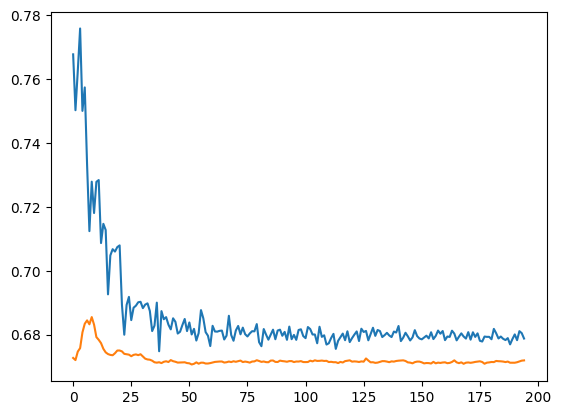

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

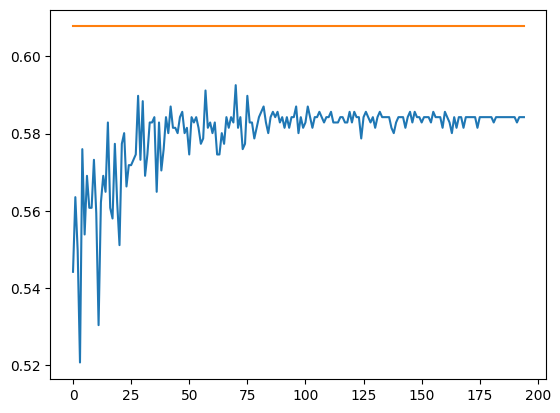

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])